<a href="https://colab.research.google.com/github/Muskaan-Chaudhary-03/Tensorflow_Projects/blob/main/Time_Series_Forecasting_of_Climate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### ***Time Series Forecasting of Climate Data***

> This project demonstrates time series forecasting of temperature using the Jena climate dataset.  We explored various modeling techniques, from simple baselines to more complex neural network architectures, leveraging TensorFlow and Keras.

> **Project Goals:**
- Load and preprocess the Jena climate dataset.
- Implement different time series forecasting models.
- Evaluate the performance of each model.
- Compare the results and identify the most effective approach.

> **Key Technologies and Libraries:**
- TensorFlow: Core deep learning library.
- Keras: High-level API for building and training neural networks.
- NumPy: Numerical computing library.
- Pandas: Data manipulation and analysis library.
- Matplotlib: Data visualization library.
- Seaborn: Statistical data visualization library.

### ***Setup***

In [44]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [46]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [48]:
csv_path = os.path.join(csv_path, 'jena_climate_2009_2016.csv') # Fix: Append the filename to the path

df = pd.read_csv(csv_path)


In [53]:
df = df[5::6]
# Slice [start:stop:step], starting from index 5 take every 6th record.

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

df.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
215,998.91,-3.12,270.13,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
431,992.93,-1.90,271.81,-6.39,71.2,5.31,3.78,1.53,2.37,3.81,1273.31,1.47,2.50,147.60
647,990.42,-3.65,270.26,-5.54,86.6,4.66,4.04,0.62,2.54,4.08,1278.21,5.49,8.38,17.44
863,994.51,-21.09,252.47,-23.01,84.3,1.13,0.95,0.18,0.59,0.95,1373.91,0.48,1.00,168.40
1079,1004.33,-6.84,265.99,-9.69,80.0,3.65,2.92,0.73,1.81,2.91,1312.26,2.13,3.50,146.30


## ***Downloading dataset***

> **Technical Approach:**
- The Jena climate dataset was downloaded and loaded using tf.keras.utils.get_file.
- Data was downsampled and cleaned by removing rows with NaN values.
- Date and time information was extracted and converted to datetime objects using pd.to_datetime.
- Data was normalized using train_df.mean() and train_df.std() to improve model training. This is a crucial step for many machine learning algorithms.
- Visualizations were created using matplotlib and seaborn to understand data characteristics, including plotting time series and distributions of normalized features.




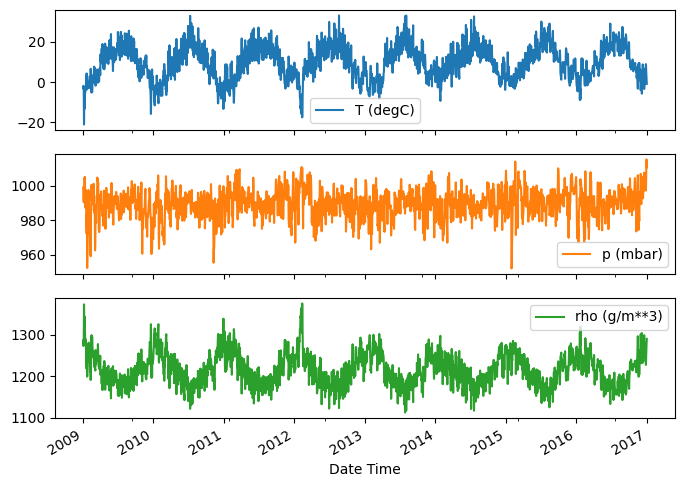

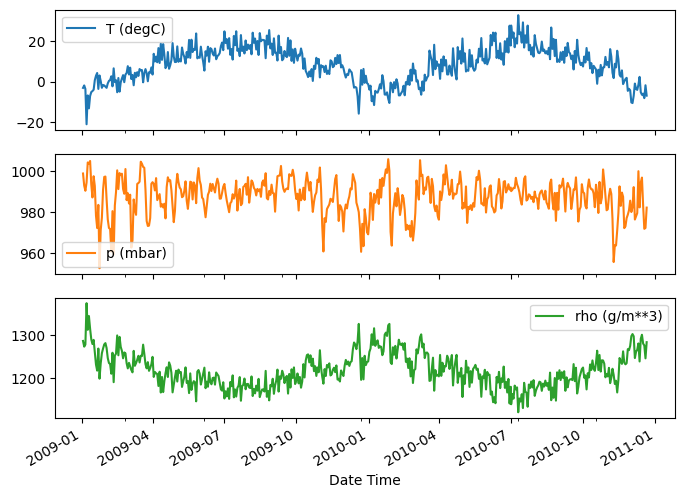

In [54]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

### ***Inspect and cleanup***

In [51]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
p (mbar),11681.0,989.204697,8.352023,944.99,984.18,989.56,994.70,1015.16
T (degC),11681.0,9.448433,8.442101,-22.13,3.33,9.42,15.44,37.28
Tpot (K),11681.0,283.491655,8.523119,251.58,277.40,283.50,289.49,311.21
Tdew (degC),11681.0,4.942438,6.704968,-24.14,0.22,5.24,10.05,21.99
rh (%),11681.0,75.996559,16.608352,20.53,64.91,79.50,89.60,100.00
VPmax (mbar),11681.0,13.586563,7.794582,1.03,7.76,11.82,17.57,63.77
VPact (mbar),11681.0,9.518291,4.160784,0.86,6.21,8.88,12.33,26.46
VPdef (mbar),11681.0,4.068260,4.980223,0.00,0.86,2.16,5.23,46.01
sh (g/kg),11681.0,6.012648,2.641299,0.54,3.91,5.60,7.79,16.89
H2OC (mmol/mol),11681.0,9.624698,4.211848,0.86,6.28,8.98,12.46,26.87


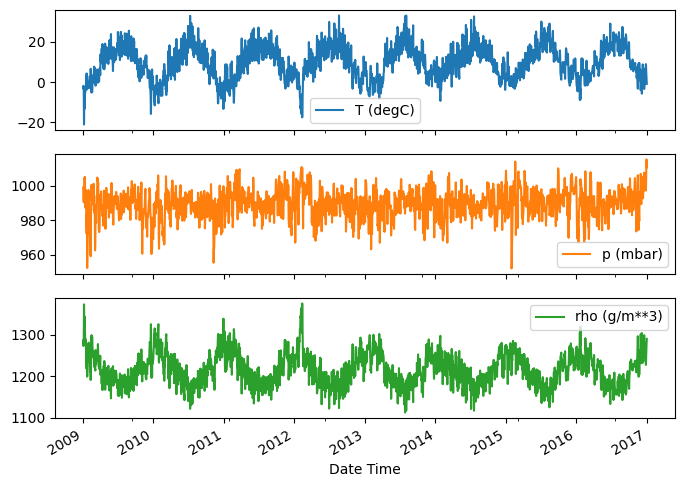

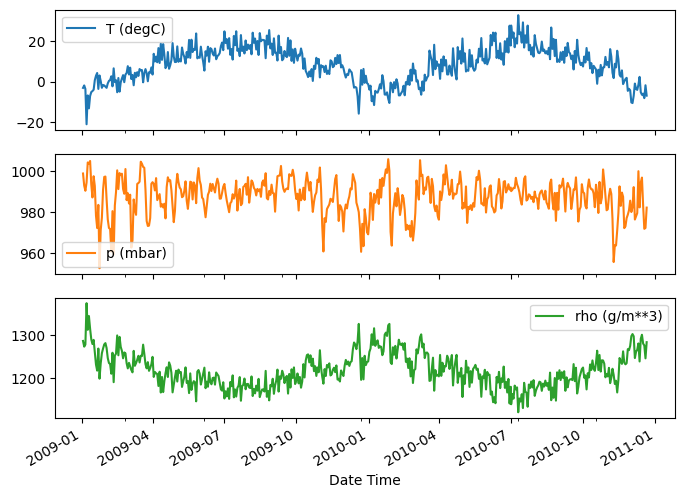

In [55]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [56]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
p (mbar),1946.0,989.458654,8.367328,952.07,984.3875,989.855,994.9050,1015.16
T (degC),1946.0,9.586973,8.220289,-21.09,3.6100,9.725,15.6600,33.01
Tpot (K),1946.0,283.609620,8.294620,252.47,277.6400,283.790,289.6275,307.28
Tdew (degC),1946.0,5.035622,6.680155,-23.01,0.3200,5.350,10.1400,20.96
rh (%),1946.0,75.467945,15.768690,25.15,63.9700,78.200,88.3000,100.00
VPmax (mbar),1946.0,13.598530,7.435348,1.13,7.9150,12.070,17.8200,50.39
VPact (mbar),1946.0,9.575041,4.181899,0.95,6.2500,8.945,12.4100,24.85
VPdef (mbar),1946.0,4.023597,4.516543,0.00,0.9725,2.405,5.5550,34.62
sh (g/kg),1946.0,6.046783,2.653782,0.59,3.9300,5.650,7.8375,15.86
H2OC (mmol/mol),1946.0,9.679152,4.231620,0.95,6.3100,9.060,12.5475,25.25


### ***Split the data***

In [57]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### ***Normalize the data***

<ipython-input-58-3ea7b2e2038e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


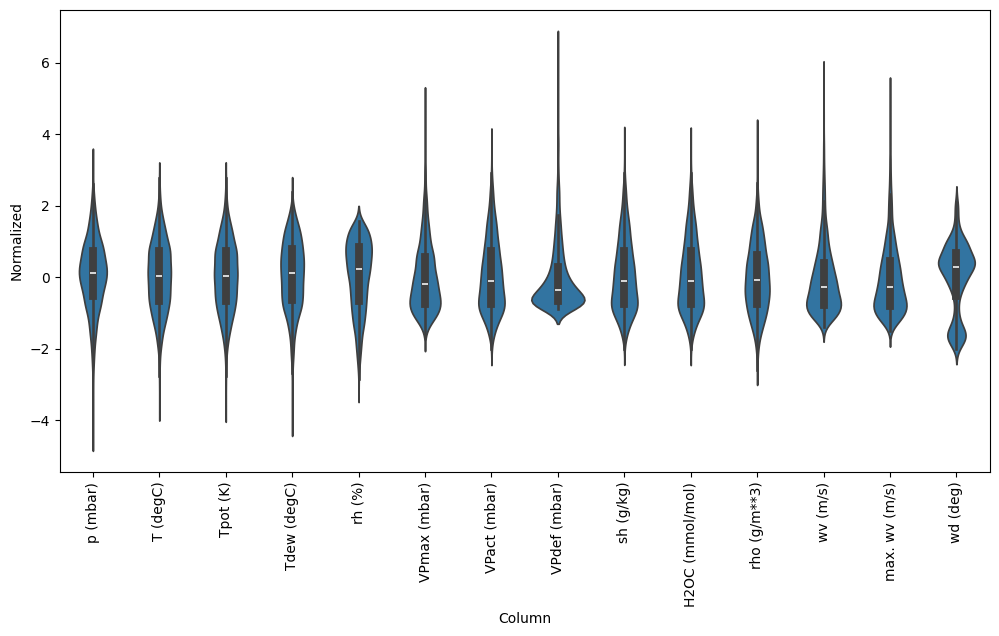

In [58]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

> **Windowing Strategy:**
- A custom WindowGenerator class was implemented to manage the input and label windows for time series forecasting. This class facilitates creating training, validation, and test datasets with varying window sizes and shifts, enabling us to experiment with different input sequences for prediction.
- Key attributes of the WindowGenerator include input_width, label_width, and shift, which control the size and positioning of the input and output sequences.
- The split_window function within the WindowGenerator class was crucial for converting the data into (input, label) pairs suitable for model training.
- The make_dataset function used tf.keras.utils.timeseries_dataset_from_array to create tf.data.Dataset objects from the windowed data, enabling efficient batching and shuffling.

### ***Indexes and offsets***

In [59]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1



Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [60]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

### ***Split***

In [61]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 14)
Inputs shape: (3, 6, 14)
Labels shape: (3, 1, 1)


### ***Plot***

In [62]:
w2.example = example_inputs, example_labels

def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

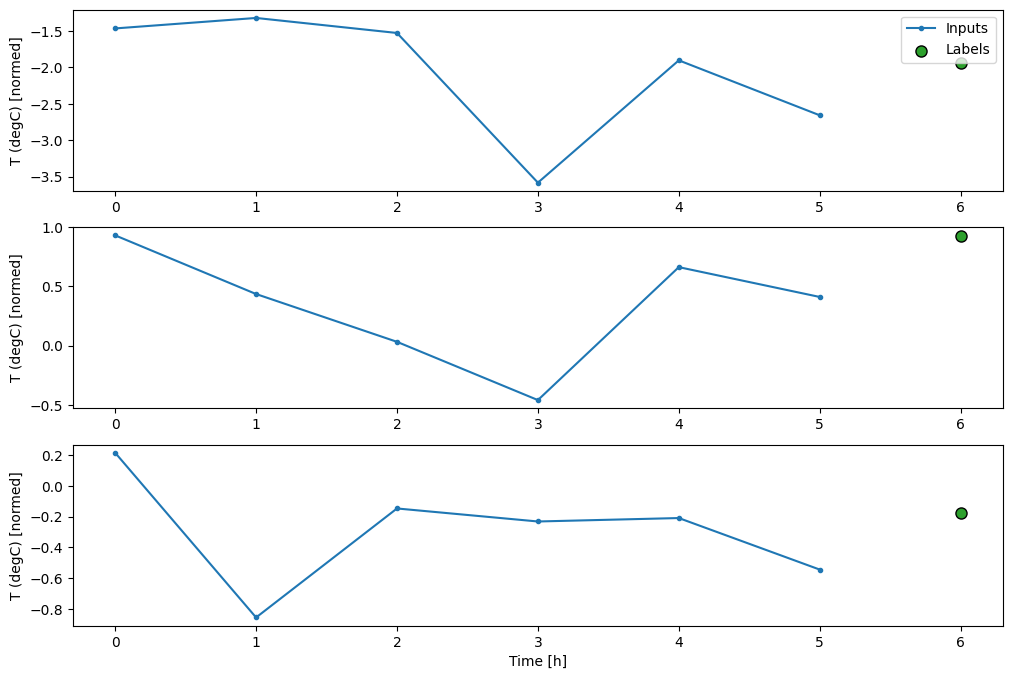

In [63]:
w2.plot()


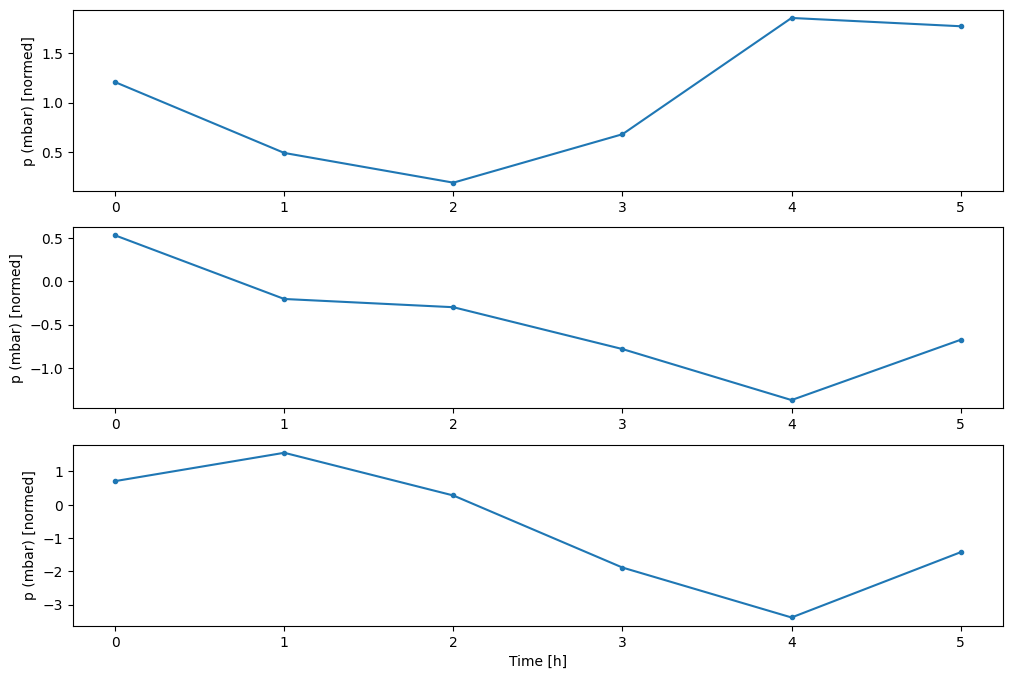

In [64]:
w2.plot(plot_col='p (mbar)')


### ***Create tf.data.Datasets***

> Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function:

In [65]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [66]:

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [67]:
# Each element is an (inputs, label) pair.
from tensorflow import TensorSpec # Import TensorSpec

@property
def element_spec(self):
    return self._element_spec

tf.data.DatasetSpec(
    element_spec, dataset_shape=()
)

w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))


for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 14)
Labels shape (batch, time, features): (32, 1, 1)


> **Model Development and Training:**
- Baseline Model: A simple baseline model was created to establish a performance benchmark. This model simply predicts the last value in the input sequence.
- Linear Model: A linear regression model was implemented using tf.keras.layers.Dense(units=1).
- Dense Neural Network: A dense neural network with two hidden layers and ReLU activation functions was implemented. Dropout layers (tf.keras.layers.Dropout) were added to prevent overfitting.
- Multi-step Dense Network: This model flattens the input sequence before feeding it to dense layers and then reshapes the output to match the expected format for multi-step predictions.
- Convolutional Neural Network (CNN): A 1D CNN (tf.keras.layers.Conv1D) was used to capture temporal patterns in the data.
- Recurrent Neural Network (RNN - LSTM): An LSTM network (tf.keras.layers.LSTM) was employed to capture long-term dependencies in the time series data. LSTMs are particularly well-suited for sequence data.
- All models were compiled using the Mean Squared Error (MSE) loss function and the Adam optimizer, except the baseline model which used SGD. The Mean Absolute Error (MAE) was used as an evaluation metric.
- The compile_and_fit function implemented early stopping using tf.keras.callbacks.EarlyStopping to prevent overfitting and optimize training time. This callback monitors the validation loss and stops training if it doesn't improve for a specified number of epochs.
- Model checkpoints were implemented using tf.keras.callbacks.ModelCheckpoint to save the best performing models based on validation loss.

### ***modelling checkpoint***

In [68]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name)+ ".keras", # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

### ***Single step models***

In [69]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [70]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 14)
Labels shape (batch, time, features): (32, 1, 1)


In [71]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


# Instantiate and evaluate this model:
baseline = Baseline(label_index=single_step_window.column_indices['T (degC)']) # Access column_indices from single_step_window instance

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [72]:

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2774 - mean_absolute_error: 0.4235


In [73]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

### ***Linear model***

In [74]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)



Input shape: (32, 1, 14)
Output shape: (32, 1, 1)
Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.7128 - mean_absolute_error: 1.5093 - val_loss: 2.7705 - val_mean_absolute_error: 1.3491
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6925 - mean_absolute_error: 1.2911 - val_loss: 2.0618 - val_mean_absolute_error: 1.1696
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9557 - mean_absolute_error: 1.0973 - val_loss: 1.5668 - val_mean_absolute_error: 1.0235
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4303 - mean_absolute_error: 0.9417 - val_loss: 1.2307 - val_mean_absolute_error: 0.9086
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0712 - mean_absolute_error: 0.8240 - val_loss: 1.0052 - val_mean_absolute_error: 0.8202
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8738 - mean_absolute_error: 0.7445 - val_loss: 0.8482 - val_mean_absolute_error: 0.7521
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7

### ***Dense***

In [75]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.6656 - mean_absolute_error: 0.6378 - val_loss: 0.3062 - val_mean_absolute_error: 0.4364
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4179 - mean_absolute_error: 0.5136 - val_loss: 0.2611 - val_mean_absolute_error: 0.4078
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3566 - mean_absolute_error: 0.4677 - val_loss: 0.2748 - val_mean_absolute_error: 0.4205
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3489 - mean_absolute_error: 0.4670 - val_loss: 0.2823 - val_mean_absolute_error: 0.4270
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2708 - mean_absolute_error: 0.4183 


### ***Multi-step dense***

In [76]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

In [77]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [78]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 14)
Output shape: (32, 1, 1)


In [85]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2304 - mean_absolute_error: 0.3882 


### ***Convolution neural network***

In [79]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [80]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2124 - mean_absolute_error: 0.3668 


### ***Recurrent neural network***

In [81]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [82]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2130 - mean_absolute_error: 0.3701 


### ***Performance***

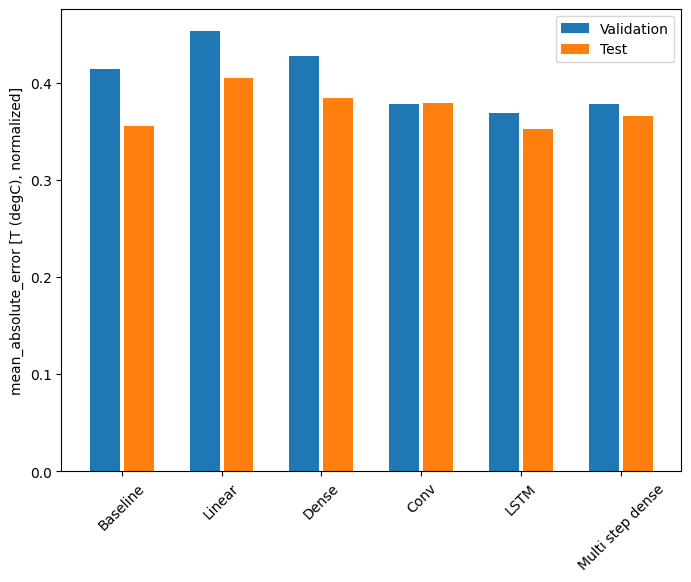

In [86]:
cm = lstm_model.metrics[1]
cm.metrics

val_performance


x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [87]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : 0.3560
Linear      : 0.4046
Dense       : 0.3839
Conv        : 0.3791
LSTM        : 0.3529
Multi step dense: 0.3655


> **Model Evaluation and Comparison:**
- The performance of each model was evaluated on the test dataset using MAE.
- The results were visualized using bar charts to compare the performance of different models. This visualization clearly showed the relative strengths and weaknesses of each approach.

1. Baseline    : 0.3560
2. Linear      : 0.4046
3. Dense       : 0.3839
4. Conv        : 0.3791
5. LSTM        : 0.3529
6. Multi step dense: 0.3655

> **Results and Conclusion:**
- The LSTM model achieved the best performance on the test set, indicating its ability to effectively capture the temporal dependencies in the data. The simpler models (linear and dense) also provided reasonable results, while the CNN and multi-step dense models provided intermediate performance.  The baseline model provided a benchmark for comparison.